In [26]:
import treedata
import treeswift

In [78]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

from helpers.utils import digraph_to_newick

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: cannot import name 'OKABE' from 'helpers.utils' (/Users/gc3045/git/laml2-experiments/real_data/preprocess/helpers/utils.py)

In [3]:
barcoded_petracer_fname = "/Users/gc3045/git/laml2-experiments/real_data/PEtracer/28473866/barcoded_tracing_clone_4.h5td"
barcoded_pet_df = treedata.read_h5td(barcoded_petracer_fname)

In [4]:
barcoded_pet_df

TreeData object with n_obs × n_vars = 3108 × 32288
    obs: 'cellBC', 'sample', 'clone', 'type', 'puro', 'blast', 'tree', 'puro_clade', 'combined_clade', 'blast_clade'
    var: 'mean_counts', 'total_counts'
    obsm: 'blast_counts', 'characters', 'puro_counts'
    obst: 'tree'

In [5]:
barcoded_tracing_alleles = "/Users/gc3045/git/laml2-experiments/real_data/PEtracer/28473866/barcoded_tracing_alleles.csv"
bt_df = pd.read_csv(barcoded_tracing_alleles).fillna('Unedited')

In [6]:
bt_df

,intID,cellBC,RNF2,HEK3,EMX1,UMI,readCount,sample,reads_per_umi,clone,whitelist
0,intID1012,pool2-AAACCCAAGTCAGCGA-1,TATAT,CTTTG,CCTTT,39,334,pool2,8.564103,4,True
1,intID1012,pool2-AAACCCAGTGATACTC-1,Unedited,GCAAG,AGTAC,69,555,pool2,8.043478,4,True
2,intID1012,pool2-AAACGAAAGCGTGTTT-1,Unedited,CTCTC,CCTTT,92,671,pool2,7.293478,4,True
3,intID1012,pool2-AAACGAACAGCCGGTT-1,ACTCC,CTTTG,CA,44,355,pool2,8.068182,4,True
4,intID1012,pool2-AAACGCTAGCATGATA-1,TATAT,GCGCC,CCTTT,45,324,pool2,7.200000,4,True
...,...,...,...,...,...,...,...,...,...,...,...
293371,intID991,pool3-TTTGGAGGTATGACAA-1,ACTTA,ATTTA,AGTAC,31,427,pool3,13.774194,3,True
293372,intID991,pool3-TTTGGAGGTCGCAACC-1,ACTTA,Unedited,AGTAC,91,1447,pool3,15.901099,3,True
293373,intID991,pool3-TTTGGTTCACCCAACG-1,ACTTA,Unedited,AGTAC,107,1654,pool3,15.457944,3,True
293374,intID991,pool3-TTTGGTTGTATCAGCT-1,TGCCA,ATTTA,AGTAC,40,563,pool3,14.075000,3,True


In [7]:
cols = ["RNF2", "HEK3", "EMX1"]
dup_states = (
    bt_df
    .groupby(["intID", "cellBC"])[cols]
    .nunique(dropna=False)
)


In [8]:
dup_states # no conflicts, already all filtered out

RNF2  HEK3  EMX1
intID     cellBC                                    
intID1012 pool2-AAACCCAAGTCAGCGA-1     1     1     1
          pool2-AAACCCAGTGATACTC-1     1     1     1
          pool2-AAACGAAAGCGTGTTT-1     1     1     1
          pool2-AAACGAACAGCCGGTT-1     1     1     1
          pool2-AAACGCTAGCATGATA-1     1     1     1
...                                  ...   ...   ...
intID991  pool3-TTTGGAGGTATGACAA-1     1     1     1
          pool3-TTTGGAGGTCGCAACC-1     1     1     1
          pool3-TTTGGTTCACCCAACG-1     1     1     1
          pool3-TTTGGTTGTATCAGCT-1     1     1     1
          pool3-TTTGTTGCATAAGCAA-1     1     1     1

[293376 rows x 3 columns]

In [9]:
# get the cells in clone 4
filtered_allele_df = bt_df[bt_df['clone'] == 4]
filtered_allele_df['cellBC'].nunique()

3108

In [10]:
cmat_df = barcoded_pet_df.obsm['characters']

In [11]:
cmat_df

,intID838-EMX1,intID838-HEK3,intID838-RNF2,intID1936-EMX1,intID1936-HEK3,intID1936-RNF2,intID1661-EMX1,intID1661-HEK3,intID1661-RNF2,intID809-EMX1,...,intID972-RNF2,intID299-EMX1,intID299-HEK3,intID299-RNF2,intID1575-EMX1,intID1575-HEK3,intID1575-RNF2,intID253-EMX1,intID253-HEK3,intID253-RNF2
pool2-AAACCCAAGTCAGCGA-1,2,0,5,1,0,4,4,0,0,6,...,4,3,0,1,6,7,6,0,0,7
pool2-AAACCCAGTGATACTC-1,-1,-1,-1,-1,-1,-1,0,0,1,0,...,7,-1,-1,-1,7,0,7,0,0,0
pool2-AAACGAAAGCGTGTTT-1,2,5,8,-1,-1,-1,4,6,3,6,...,0,-1,-1,-1,1,8,4,0,0,4
pool2-AAACGAACAGCCGGTT-1,2,3,7,-1,-1,-1,1,5,8,6,...,5,4,4,1,7,5,7,0,0,9
pool2-AAACGCTAGCATGATA-1,2,3,0,2,0,4,7,2,0,4,...,6,4,0,2,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pool2-TTTGGTTAGGTCTGGA-1,2,2,4,7,2,4,3,0,6,-1,...,0,1,0,7,7,3,7,0,0,0
pool2-TTTGGTTGTCTACGTA-1,2,3,2,3,4,4,7,0,8,4,...,7,-1,-1,-1,1,0,0,0,0,4
pool2-TTTGGTTTCAGGCGAA-1,2,0,5,0,7,4,4,6,3,6,...,3,0,0,4,0,0,4,0,0,0
pool2-TTTGTTGCAACACAAA-1,2,8,4,1,4,4,4,0,6,-1,...,6,0,0,8,3,0,0,0,0,0


In [12]:
clone_cell_names = list(cmat_df.index)

In [13]:
clone_cell_names

['pool2-AAACCCAAGTCAGCGA-1',
 'pool2-AAACCCAGTGATACTC-1',
 'pool2-AAACGAAAGCGTGTTT-1',
 'pool2-AAACGAACAGCCGGTT-1',
 'pool2-AAACGCTAGCATGATA-1',
 'pool2-AAACGCTAGCGTATGG-1',
 'pool2-AAACGCTCAATTGTGC-1',
 'pool2-AAACGCTCAGAACCGA-1',
 'pool2-AAAGAACAGTAGACCG-1',
 'pool2-AAAGAACAGTCAACAA-1',
 'pool2-AAAGGATAGGATTCAA-1',
 'pool2-AAAGGATAGTAAGAGG-1',
 'pool2-AAAGGATGTAAGGTCG-1',
 'pool2-AAAGGATGTAGTATAG-1',
 'pool2-AAAGGATGTGAATTGA-1',
 'pool2-AAAGGATTCATGACAC-1',
 'pool2-AAAGGATTCGTTCCTG-1',
 'pool2-AAAGGATTCTAGTACG-1',
 'pool2-AAAGGGCCAGCGTATT-1',
 'pool2-AAAGGGCGTCCTACAA-1',
 'pool2-AAAGGGCTCCTTATAC-1',
 'pool2-AAAGGTAAGGGACCAT-1',
 'pool2-AAAGGTAAGGGCAACT-1',
 'pool2-AAAGGTACAAAGTGTA-1',
 'pool2-AAAGGTACAAGTTGGG-1',
 'pool2-AAAGGTACACTCCGGA-1',
 'pool2-AAAGTCCTCATGCCGG-1',
 'pool2-AAAGTCCTCTACGCAA-1',
 'pool2-AAAGTGAAGAGAGGGC-1',
 'pool2-AAAGTGAAGGATAATC-1',
 'pool2-AAAGTGAAGTTGTAAG-1',
 'pool2-AAAGTGACAAACTCTG-1',
 'pool2-AAAGTGATCTACTGAG-1',
 'pool2-AAATGGAAGGCTCCCA-1',
 'pool2-AAATGG

### Process into obsmat input

1. Rename the columns.
2. For each cell and site, list for several confusion probabilities = [0.01, 0.03, 0.05, 0.07, 0.1]. 

In [36]:
og_columns = cmat_df.columns
cmat_df.columns = [f'character_{x}' for x, _ in enumerate(cmat_df.columns)]

In [37]:
column_remapping = zip(og_columns, cmat_df.columns)

In [39]:
df = pd.DataFrame(column_remapping, columns=["old_col_name", "new_col_name"])
df.to_csv('/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_column_mapping.csv')

In [17]:
cmat_df

,character_0,character_1,character_2,character_3,character_4,character_5,character_6,character_7,character_8,character_9,...,character_26,character_27,character_28,character_29,character_30,character_31,character_32,character_33,character_34,character_35
pool2-AAACCCAAGTCAGCGA-1,2,0,5,1,0,4,4,0,0,6,...,4,3,0,1,6,7,6,0,0,7
pool2-AAACCCAGTGATACTC-1,-1,-1,-1,-1,-1,-1,0,0,1,0,...,7,-1,-1,-1,7,0,7,0,0,0
pool2-AAACGAAAGCGTGTTT-1,2,5,8,-1,-1,-1,4,6,3,6,...,0,-1,-1,-1,1,8,4,0,0,4
pool2-AAACGAACAGCCGGTT-1,2,3,7,-1,-1,-1,1,5,8,6,...,5,4,4,1,7,5,7,0,0,9
pool2-AAACGCTAGCATGATA-1,2,3,0,2,0,4,7,2,0,4,...,6,4,0,2,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pool2-TTTGGTTAGGTCTGGA-1,2,2,4,7,2,4,3,0,6,-1,...,0,1,0,7,7,3,7,0,0,0
pool2-TTTGGTTGTCTACGTA-1,2,3,2,3,4,4,7,0,8,4,...,7,-1,-1,-1,1,0,0,0,0,4
pool2-TTTGGTTTCAGGCGAA-1,2,0,5,0,7,4,4,6,3,6,...,3,0,0,4,0,0,4,0,0,0
pool2-TTTGTTGCAACACAAA-1,2,8,4,1,4,4,4,0,6,-1,...,6,0,0,8,3,0,0,0,0,0


In [18]:
etas = [0.01, 0.03, 0.05, 0.07, 0.10]
states = np.arange(9)  # 0..8

long_df = (
    cmat_df
    .stack()
    .reset_index()
)
long_df.columns = ["cell_name", "target_site", "state"]
long_df["state"] = pd.to_numeric(long_df["state"], errors="coerce")
long_df = long_df[long_df["state"].isin(states)].copy() # drop all missing genotypes as no obs
for eta in etas:
    tmp = long_df.copy()

    n_rows = len(tmp)
    probs = np.full((n_rows, 9), np.log(eta / 8.0), dtype=float)  # default: eta/8 for all states

    row_idx = np.arange(n_rows)
    obs_states = tmp["state"].astype(int).to_numpy()
    probs[row_idx, obs_states] = np.log(1.0 - eta)

    for s in states:
        tmp[f"state{s}_prob"] = probs[:, s]

    tmp = tmp.drop(columns=["state"])
    tmp["target_site"] = (
        tmp["target_site"]
        .astype(str)
        .str.split("_")
        .str[-1]
        .astype(int)
    )
    
    tmp["cassette_idx"] = 0
    ordered_cols = (
        ["cell_name", "cassette_idx", "target_site"]
        + [f"state{s}_prob" for s in states]
    )
    tmp = tmp[ordered_cols]

    out_path = f"/Users/gc3045/git/laml2-experiments/real_data/PEtracer/inputs/barcode_tracing/state_probs_eta_{eta:.2f}.csv"
    tmp.to_csv(out_path, index=False)
    print(f"Wrote: {out_path}")

Wrote: /Users/gc3045/git/laml2-experiments/real_data/PEtracer/inputs/barcode_tracing/state_probs_eta_0.01.csv
Wrote: /Users/gc3045/git/laml2-experiments/real_data/PEtracer/inputs/barcode_tracing/state_probs_eta_0.03.csv
Wrote: /Users/gc3045/git/laml2-experiments/real_data/PEtracer/inputs/barcode_tracing/state_probs_eta_0.05.csv
Wrote: /Users/gc3045/git/laml2-experiments/real_data/PEtracer/inputs/barcode_tracing/state_probs_eta_0.07.csv
Wrote: /Users/gc3045/git/laml2-experiments/real_data/PEtracer/inputs/barcode_tracing/state_probs_eta_0.10.csv


In [19]:
cmat_df.to_csv('/Users/gc3045/git/laml2-experiments/real_data/PEtracer/inputs/barcode_tracing/barcode_pet_character_matrix.csv')

In [20]:
barcoded_pet_df.obst['tree']

In [21]:
petracer_tree_digraph = barcoded_pet_df.obst['tree'].copy()

In [23]:
petracer_tree_digraph

In [24]:
[n for n, d in petracer_tree_digraph.in_degree() if d == 0]

['root']

In [27]:
newick = digraph_to_newick(petracer_tree_digraph, root="root", length_attr="time")
t = treeswift.read_tree_newick(newick)

In [28]:
t.write_tree_newick("/Users/gc3045/git/laml2-experiments/real_data/PEtracer/inputs/trees/barcode/clone4_exp3.published_petracer.nwk")

In [29]:
t.resolve_polytomies()

In [30]:
t.write_tree_newick("/Users/gc3045/git/laml2-experiments/real_data/PEtracer/inputs/trees/barcode/clone4_exp3.published_petracer.binary.nwk")

In [35]:
t.height()

16.00000004437337

#### Evaluate tree by the inferred height of these barcodes

In [32]:
round2_annot_df = barcoded_pet_df.obs['blast'][clone_cell_names]

In [33]:
round1_annot_df = barcoded_pet_df.obs['puro'][clone_cell_names]

In [61]:
round2_annot_df, round1_annot_df

(pool2-AAACCCAAGTCAGCGA-1     38
 pool2-AAACCCAGTGATACTC-1     89
 pool2-AAACGAAAGCGTGTTT-1     35
 pool2-AAACGAACAGCCGGTT-1    NaN
 pool2-AAACGCTAGCATGATA-1     27
                            ... 
 pool2-TTTGGTTAGGTCTGGA-1     25
 pool2-TTTGGTTGTCTACGTA-1      8
 pool2-TTTGGTTTCAGGCGAA-1      7
 pool2-TTTGTTGCAACACAAA-1     31
 pool2-TTTGTTGGTCCATACA-1      4
 Name: blast, Length: 3108, dtype: category
 Categories (97, object): ['1', '2', '3', '4', ..., '94', '95', '96', '97'],
 pool2-AAACCCAAGTCAGCGA-1      2
 pool2-AAACCCAGTGATACTC-1    NaN
 pool2-AAACGAAAGCGTGTTT-1      6
 pool2-AAACGAACAGCCGGTT-1     16
 pool2-AAACGCTAGCATGATA-1     10
                            ... 
 pool2-TTTGGTTAGGTCTGGA-1      9
 pool2-TTTGGTTGTCTACGTA-1      7
 pool2-TTTGGTTTCAGGCGAA-1      1
 pool2-TTTGTTGCAACACAAA-1      5
 pool2-TTTGTTGGTCCATACA-1      1
 Name: puro, Length: 3108, dtype: category
 Categories (29, object): ['1', '2', '3', '4', ..., '26', '27', '28', '29'])

In [34]:
t

##### Save new colony_tracing h5td files

In [54]:
from pathlib import Path
import subprocess
import networkx

In [41]:
barcoded_petracer_fname = "/Users/gc3045/git/laml2-experiments/real_data/PEtracer/28473866/barcoded_tracing_clone_4.h5td"
barcoded_pet_df = treedata.read_h5td(barcoded_petracer_fname)

In [43]:
base_dir = Path("/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_experiment3")
newick_files = sorted(base_dir.rglob("*.newick"))


In [47]:
barcoded_pet_df.obst['tree']

In [66]:
round1 = round1_annot_df
round2 = round2_annot_df

In [67]:
### Are there cells that have both puro and blast labels

puro_cells  = set(round1.dropna().index)
blast_cells = set(round2.dropna().index)
both_cells = puro_cells & blast_cells

double_labeled_df = (
    pd.DataFrame({"puro": round1, "blast": round2})
      .dropna(subset=["puro", "blast"])
)

In [68]:
double_labeled_df

,puro,blast
pool2-AAACCCAAGTCAGCGA-1,2,38
pool2-AAACGAAAGCGTGTTT-1,6,35
pool2-AAACGCTAGCATGATA-1,10,27
pool2-AAACGCTAGCGTATGG-1,5,31
pool2-AAACGCTCAATTGTGC-1,9,25
...,...,...
pool2-TTTGGTTAGGTCTGGA-1,9,25
pool2-TTTGGTTGTCTACGTA-1,7,8
pool2-TTTGGTTTCAGGCGAA-1,1,7
pool2-TTTGTTGCAACACAAA-1,5,31


Okay so a bunch of them have both puro and blast labels.

In [74]:
height = 16
print("Found", len(newick_files), "Newick files")
f = newick_files[0]
# for f in newick_files:
tmp_df = barcoded_pet_df.copy()

t = treeswift.read_tree_newick(str(f))
label_to_node = t.label_to_node(selection="leaves")  # {label -> Node}

# attach puro and blast labels
for cell, val in round1.dropna().items():
    node = label_to_node.get(cell)
    if node is not None:
        node.puro_label = val  # or True / int / whatever you want

for cell, val in round2.dropna().items():
    node = label_to_node.get(cell)
    if node is not None:
        node.blast_label = val

blast_lcas = {}
for barcode_id, sub in round2.dropna().groupby(round2.dropna()):
    barcoded_cells = set(sub.index) & set(label_to_node.keys())
    if not barcoded_cells:
        continue
    lca_node = t.mrca(barcoded_cells)
    blast_lcas[barcode_id] = lca_node
    # annotate node with the clone id (could be a list if you want multiple)
    if not hasattr(lca_node, "blast_clone_ids"):
        lca_node.blast_clone_ids = set()
    lca_node.blast_clone_ids.add(barcode_id)

t.scale_edges(height / t.height())
print(f)
lp_tree_fname = f.with_name(f"{f.stem}.scaled6days.newick")
print(lp_tree_fname)
t.write_tree_newick(str(lp_tree_fname))

# write to file for the petracer pipeline
# lp_tree_digraph_fname = lp_tree_fname.with_suffix(".graphml")

# output = subprocess.run(["python", "/Users/gc3045/git/laml2-experiments/real_data/analysis/helpers/newick_to_digraph_ete.py",
#                      str(lp_tree_fname),
#                      "-o", str(lp_tree_digraph_fname)])
# lp_digraph = networkx.read_graphml(lp_tree_digraph_fname)
# tmp_df.obst['tree'] = lp_digraph
# tmp_df.write_h5td(f"/Users/gc3045/git/laml2-experiments/real_data/PEtracer/PEtracer-2025/barcoded_tracing/data/barcode_clone4_lamlpro_{f.stem}.h5td")
# print(f"/Users/gc3045/git/laml2-experiments/real_data/PEtracer/PEtracer-2025/barcoded_tracing/data/barcode_clone4_lamlpro_{f.stem}.h5td")

# break

Found 5 Newick files


/var/folders/jx/nl4vbs_j5qdbrq_3w4lqgcwc0000gn/T/ipykernel_36015/723733665.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for barcode_id, sub in round2.dropna().groupby(round2.dropna()):


/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_experiment3/fastlaml_barcode_clone4_exp3.published_petracer.binary_state_probs_eta_0.01_tree.newick
/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_experiment3/fastlaml_barcode_clone4_exp3.published_petracer.binary_state_probs_eta_0.01_tree.scaled6days.newick


In [83]:
colors = ["#56B4E9", "#E69F00"] 

Found 5 Newick files
/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_experiment3/fastlaml_barcode_clone4_exp3.published_petracer.binary_state_probs_eta_0.01_tree.newick


/var/folders/jx/nl4vbs_j5qdbrq_3w4lqgcwc0000gn/T/ipykernel_36015/2537890754.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for barcode_id, sub in round1.dropna().groupby(round1.dropna()):
/var/folders/jx/nl4vbs_j5qdbrq_3w4lqgcwc0000gn/T/ipykernel_36015/2537890754.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for barcode_id, sub in round2.dropna().groupby(round2.dropna()):


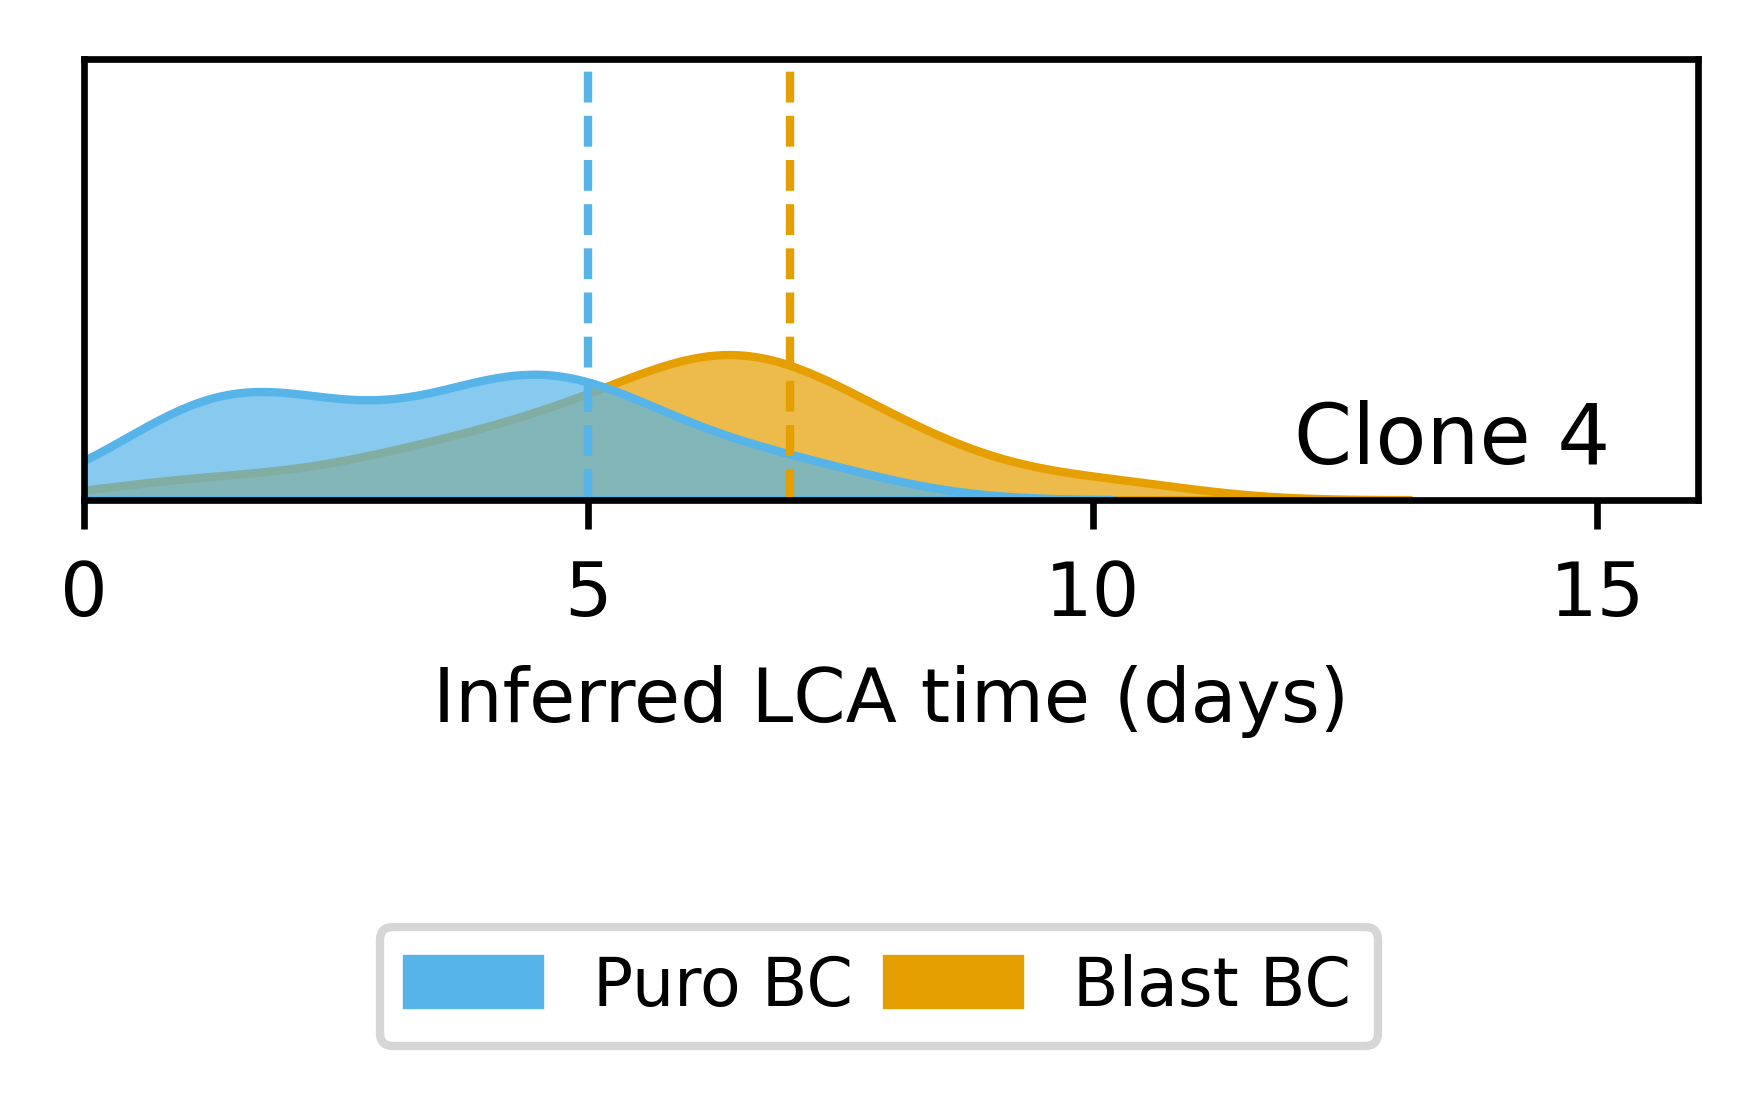

/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_experiment3/fastlaml_barcode_clone4_exp3.published_petracer.binary_state_probs_eta_0.01_tree.newick
/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_experiment3/fastlaml_barcode_clone4_exp3.published_petracer.binary_state_probs_eta_0.01_tree.scaled6days.newick
/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_experiment3/fastlaml_barcode_clone4_exp3.published_petracer.binary_state_probs_eta_0.03_tree.newick


/var/folders/jx/nl4vbs_j5qdbrq_3w4lqgcwc0000gn/T/ipykernel_36015/2537890754.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for barcode_id, sub in round1.dropna().groupby(round1.dropna()):
/var/folders/jx/nl4vbs_j5qdbrq_3w4lqgcwc0000gn/T/ipykernel_36015/2537890754.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for barcode_id, sub in round2.dropna().groupby(round2.dropna()):


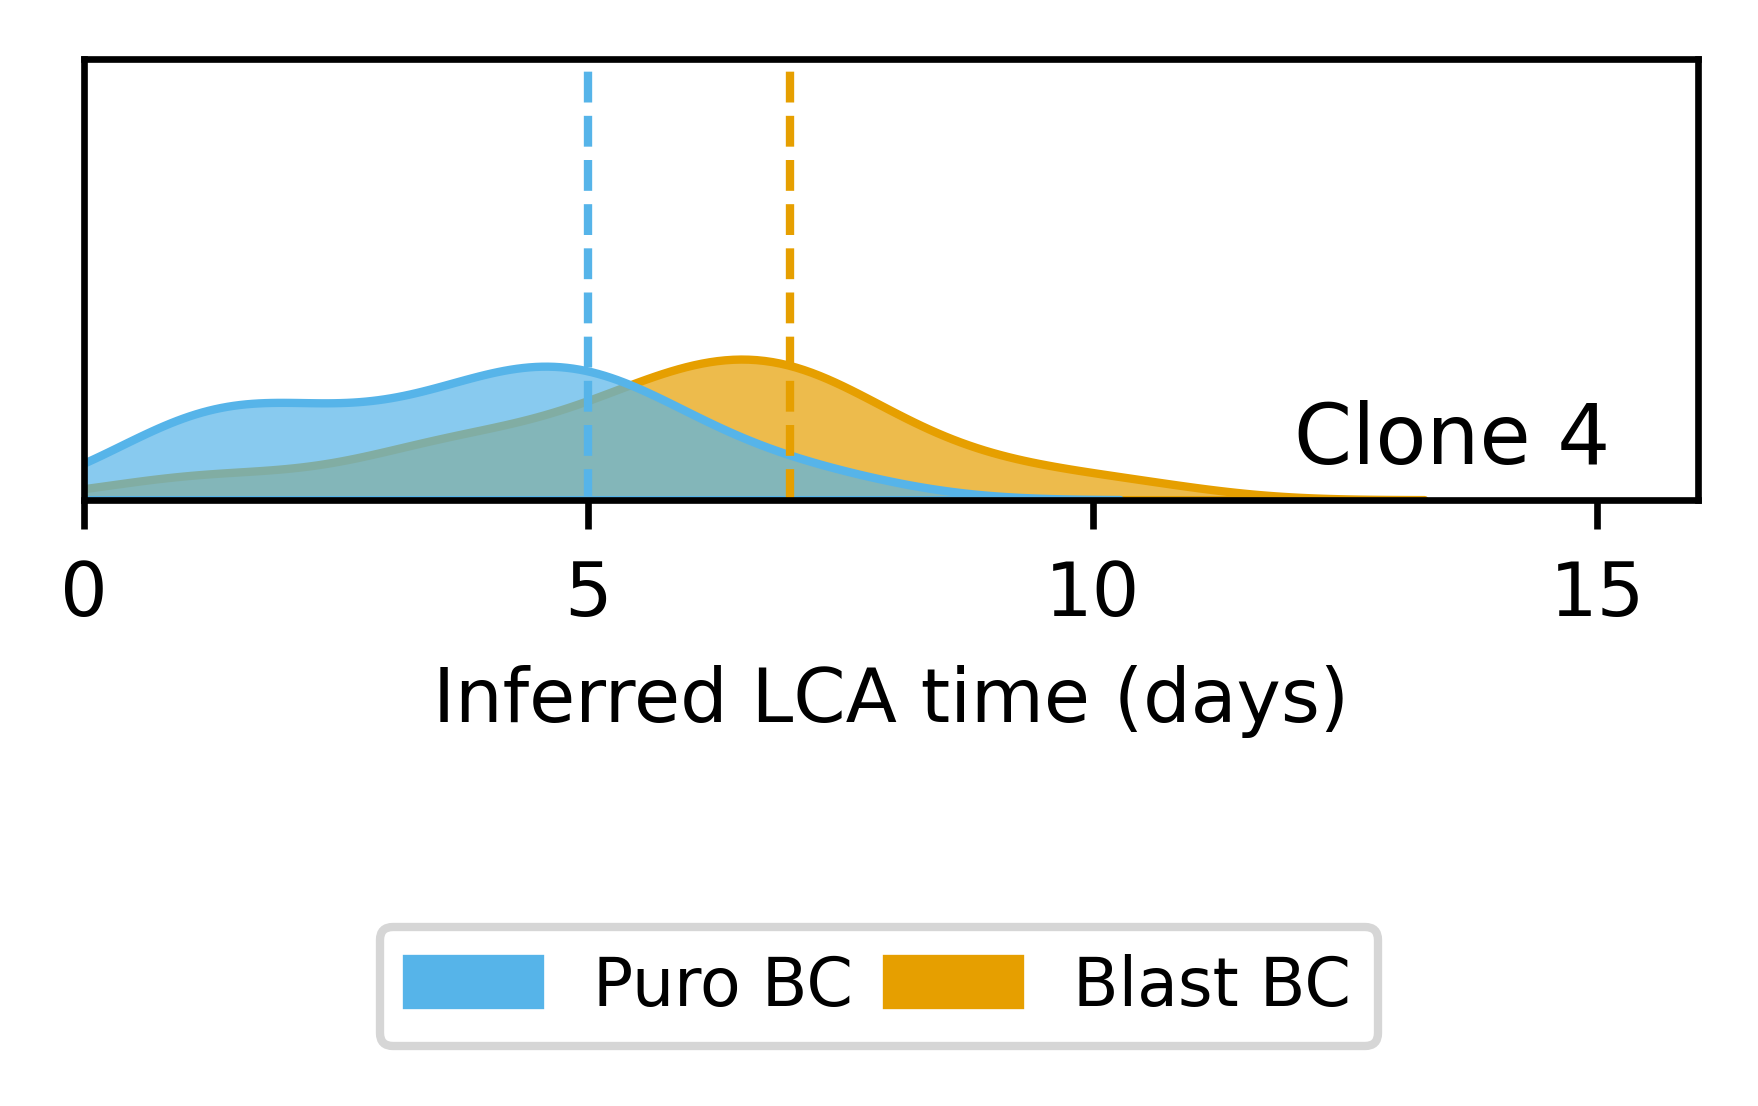

/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_experiment3/fastlaml_barcode_clone4_exp3.published_petracer.binary_state_probs_eta_0.03_tree.newick
/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_experiment3/fastlaml_barcode_clone4_exp3.published_petracer.binary_state_probs_eta_0.03_tree.scaled6days.newick
/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_experiment3/fastlaml_barcode_clone4_exp3.published_petracer.binary_state_probs_eta_0.05_tree.newick


/var/folders/jx/nl4vbs_j5qdbrq_3w4lqgcwc0000gn/T/ipykernel_36015/2537890754.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for barcode_id, sub in round1.dropna().groupby(round1.dropna()):
/var/folders/jx/nl4vbs_j5qdbrq_3w4lqgcwc0000gn/T/ipykernel_36015/2537890754.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for barcode_id, sub in round2.dropna().groupby(round2.dropna()):


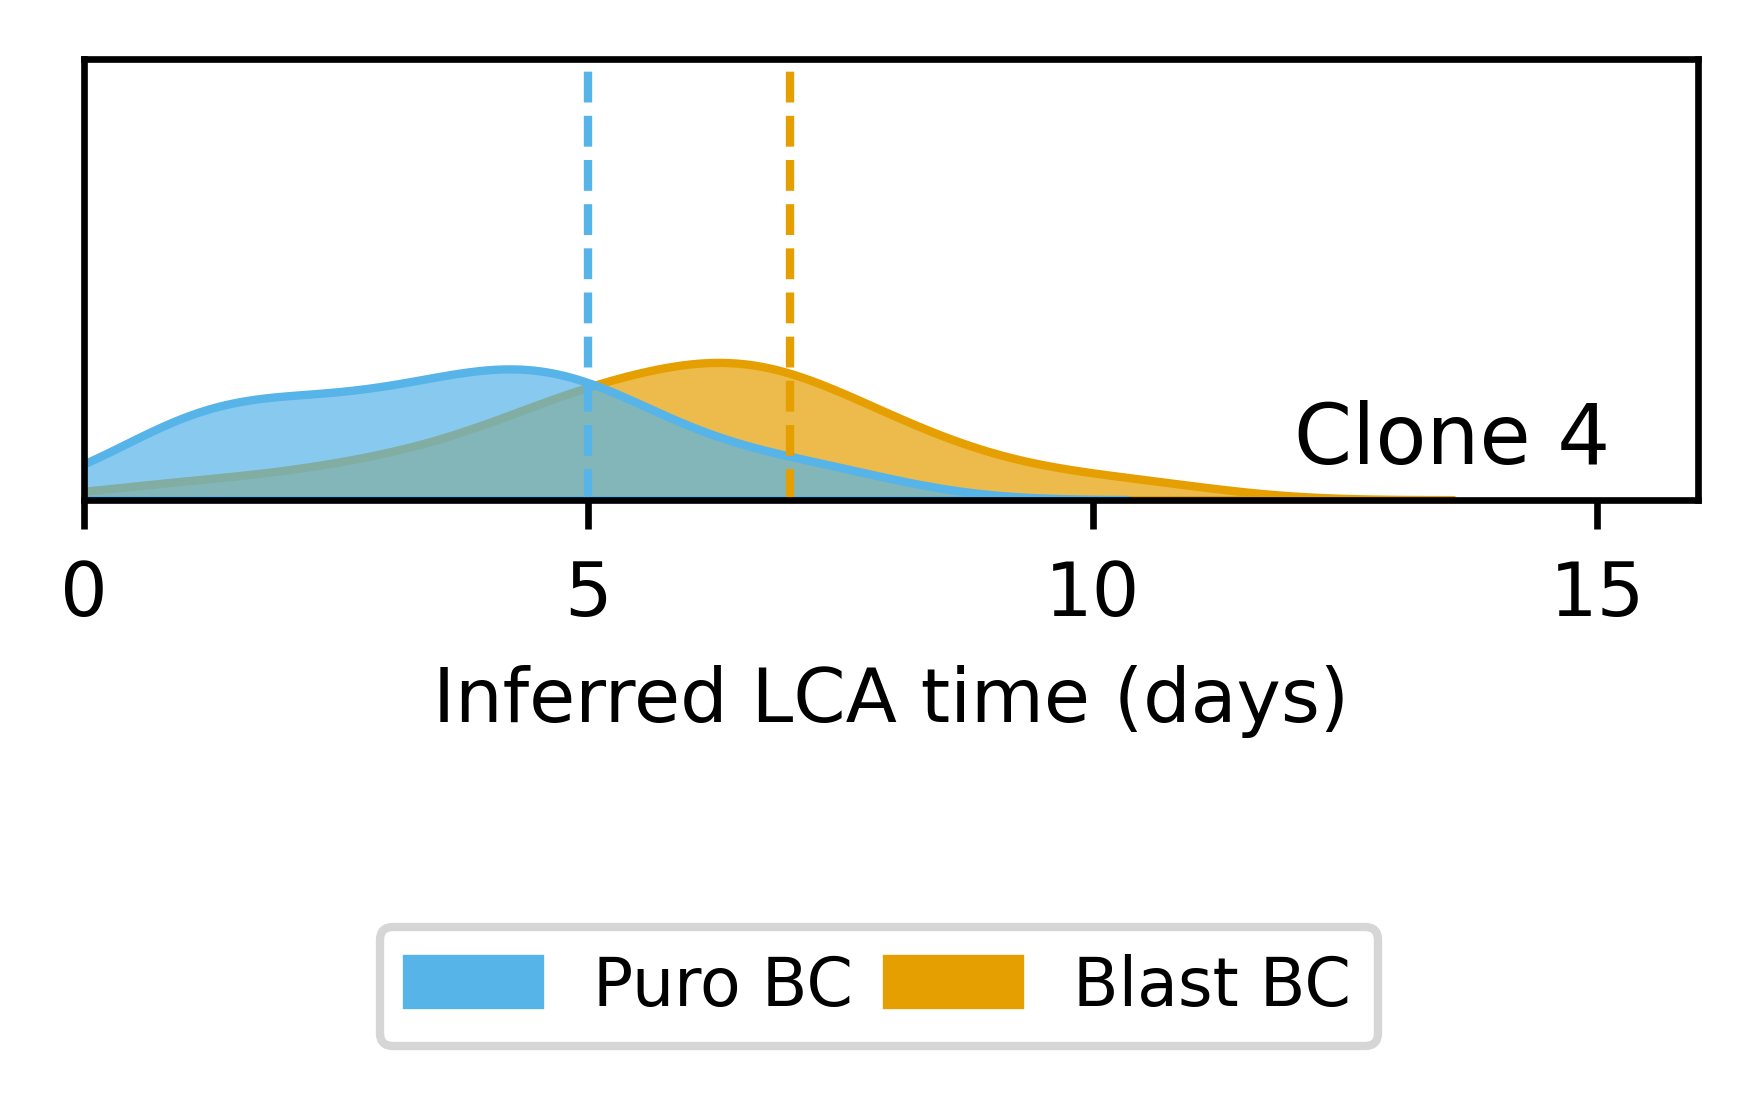

/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_experiment3/fastlaml_barcode_clone4_exp3.published_petracer.binary_state_probs_eta_0.05_tree.newick
/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_experiment3/fastlaml_barcode_clone4_exp3.published_petracer.binary_state_probs_eta_0.05_tree.scaled6days.newick
/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_experiment3/fastlaml_barcode_clone4_exp3.published_petracer.binary_state_probs_eta_0.07_tree.newick


/var/folders/jx/nl4vbs_j5qdbrq_3w4lqgcwc0000gn/T/ipykernel_36015/2537890754.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for barcode_id, sub in round1.dropna().groupby(round1.dropna()):
/var/folders/jx/nl4vbs_j5qdbrq_3w4lqgcwc0000gn/T/ipykernel_36015/2537890754.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for barcode_id, sub in round2.dropna().groupby(round2.dropna()):


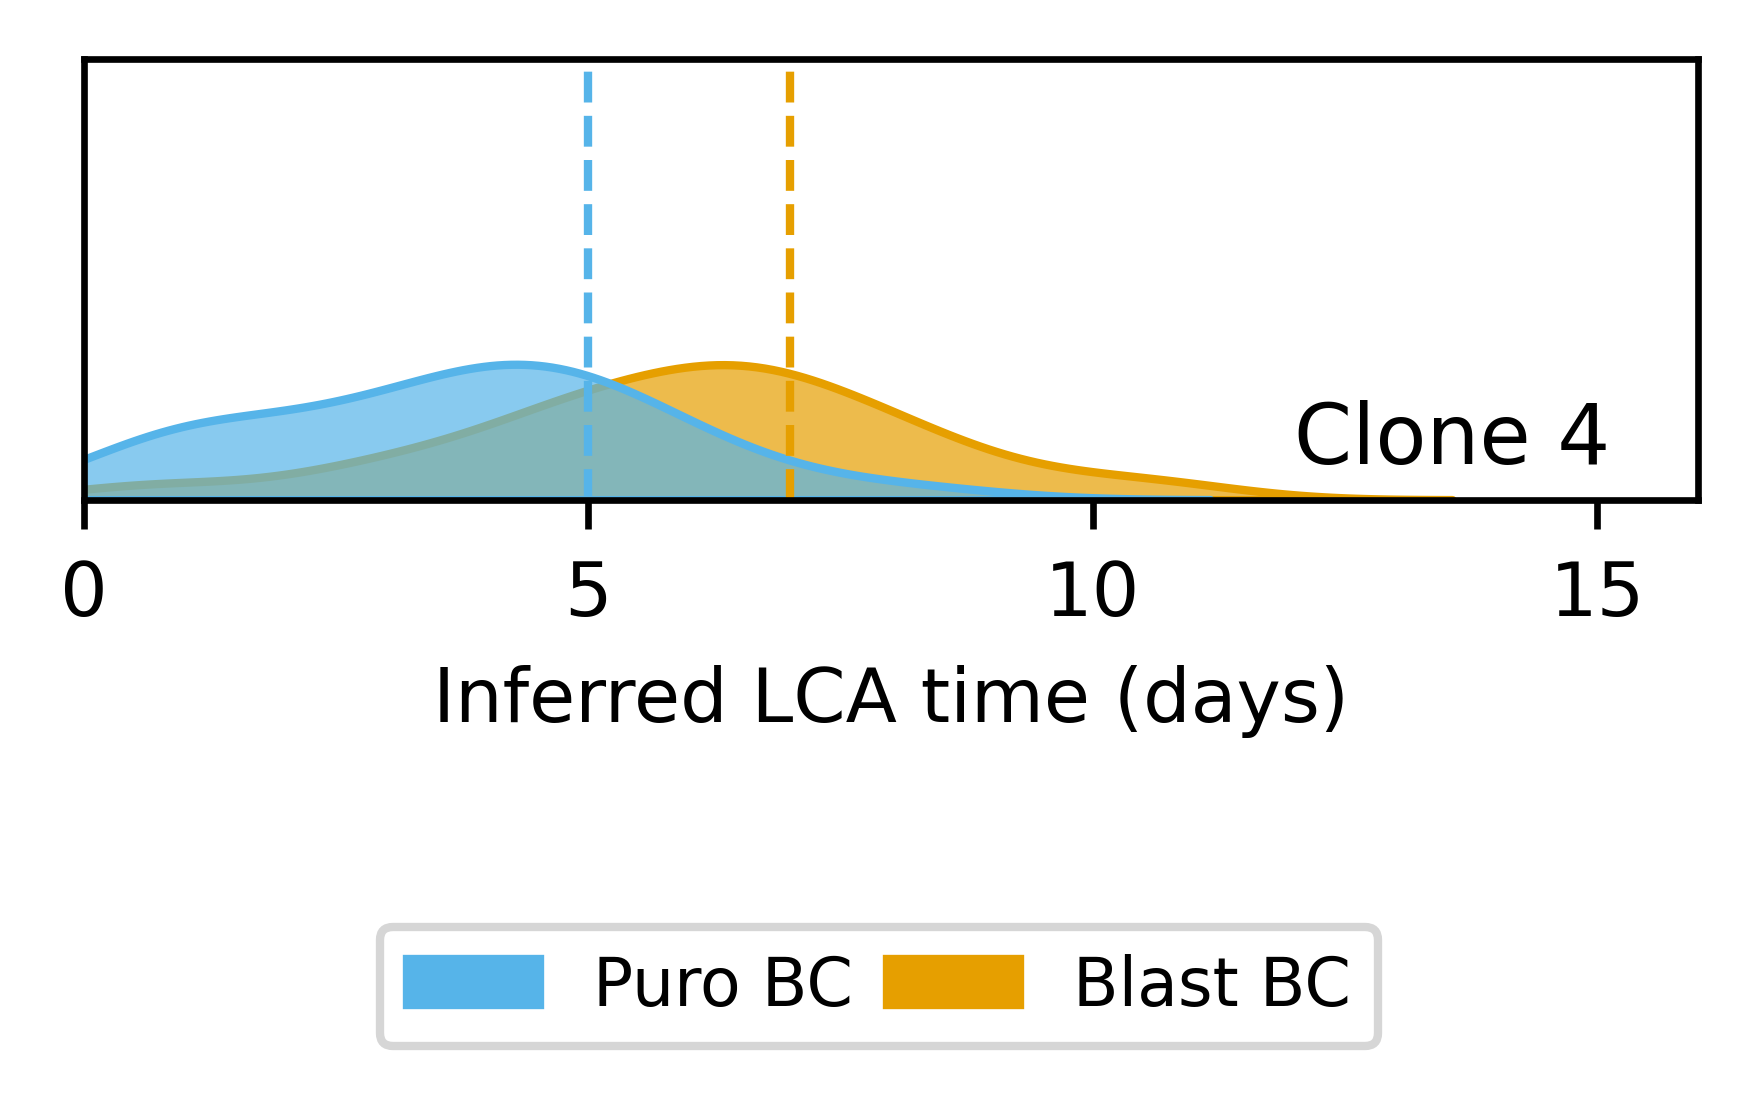

/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_experiment3/fastlaml_barcode_clone4_exp3.published_petracer.binary_state_probs_eta_0.07_tree.newick
/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_experiment3/fastlaml_barcode_clone4_exp3.published_petracer.binary_state_probs_eta_0.07_tree.scaled6days.newick
/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_experiment3/fastlaml_barcode_clone4_exp3.published_petracer.binary_state_probs_eta_0.10_tree.newick


/var/folders/jx/nl4vbs_j5qdbrq_3w4lqgcwc0000gn/T/ipykernel_36015/2537890754.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for barcode_id, sub in round1.dropna().groupby(round1.dropna()):
/var/folders/jx/nl4vbs_j5qdbrq_3w4lqgcwc0000gn/T/ipykernel_36015/2537890754.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for barcode_id, sub in round2.dropna().groupby(round2.dropna()):


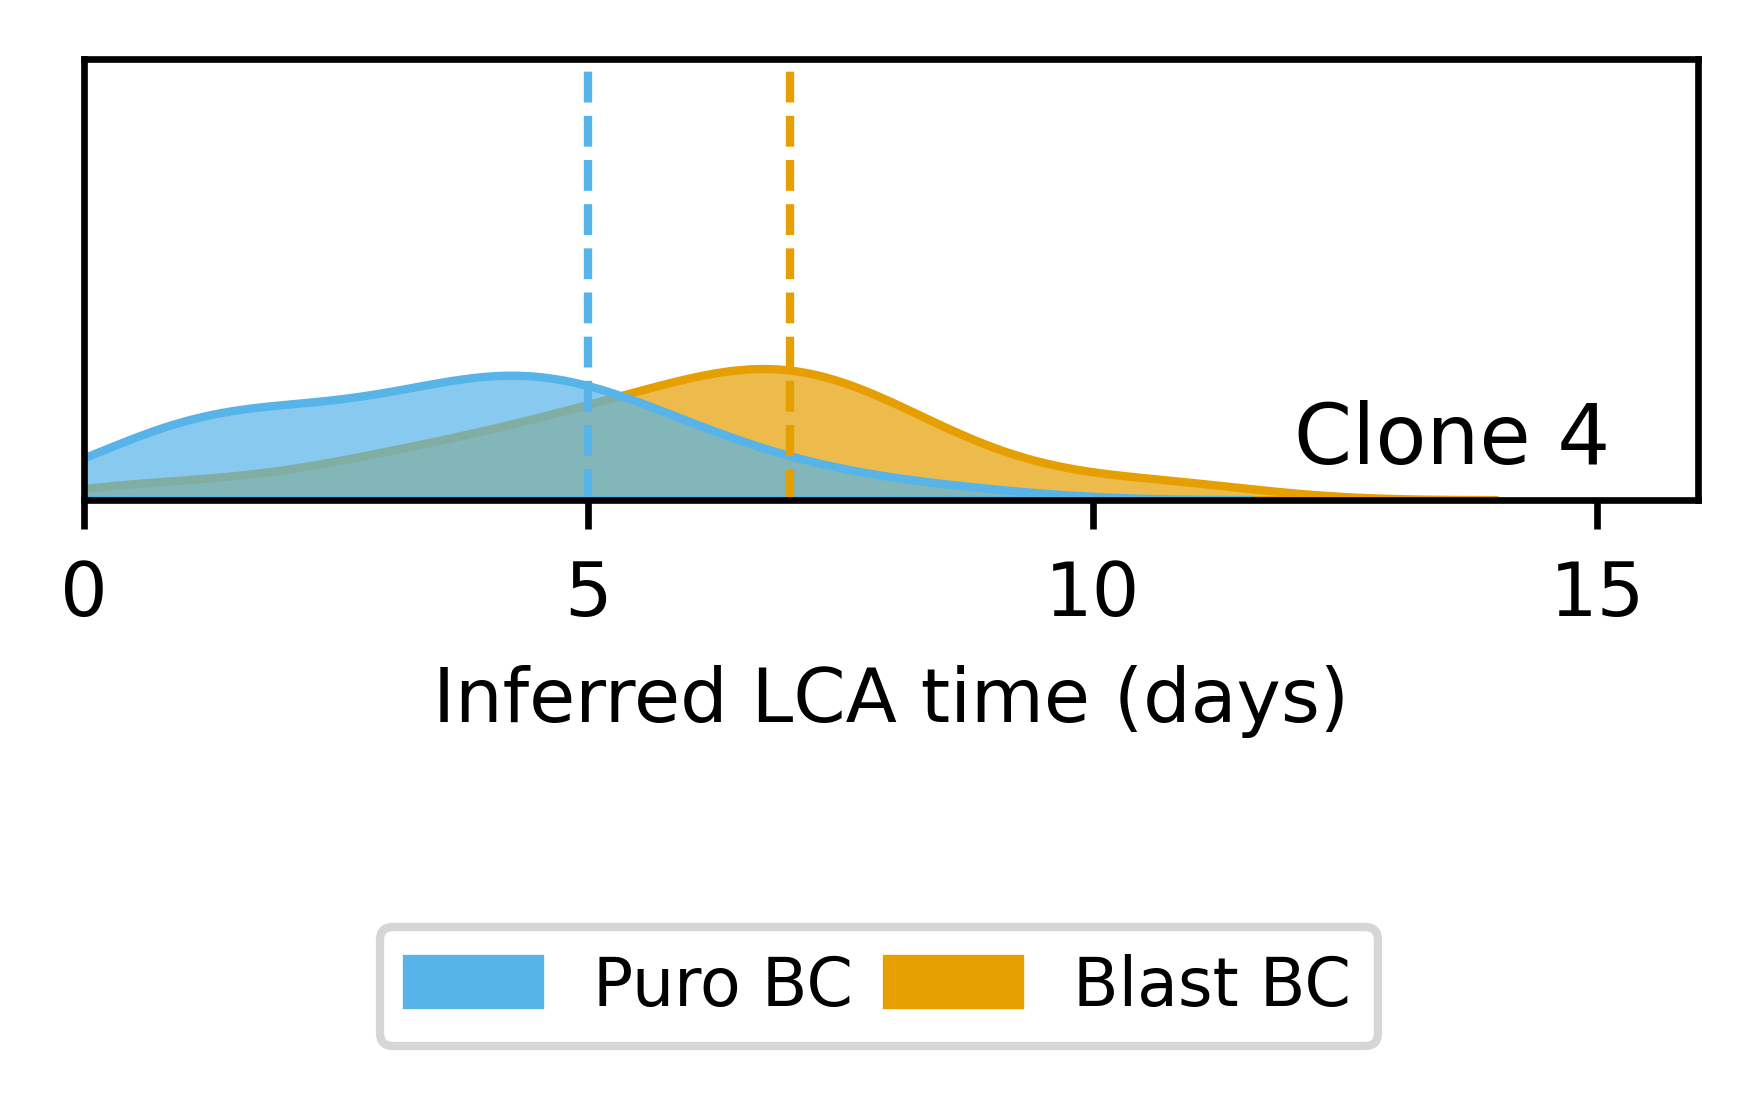

/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_experiment3/fastlaml_barcode_clone4_exp3.published_petracer.binary_state_probs_eta_0.10_tree.newick
/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_experiment3/fastlaml_barcode_clone4_exp3.published_petracer.binary_state_probs_eta_0.10_tree.scaled6days.newick


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import seaborn as sns
import treeswift

height = 16  # total tree height in days
clone_id = 4  # or whatever clone you’re working on

print("Found", len(newick_files), "Newick files")
# f = newick_files[0]   # or loop over these
for f in newick_files: 
    print(f)
    tmp_df = barcoded_pet_df.copy()
    
    # --- read & scale tree ---
    t = treeswift.read_tree_newick(str(f))
    label_to_node = t.label_to_node(selection="leaves")  # {label -> Node}
    
    # attach puro and blast labels to leaves (optional annotation)
    for cell, val in round1.dropna().items():
        node = label_to_node.get(cell)
        if node is not None:
            node.puro_label = val
    
    for cell, val in round2.dropna().items():
        node = label_to_node.get(cell)
        if node is not None:
            node.blast_label = val
    
    # --- compute LCAs for each barcode in each round ---
    puro_lcas = {}
    for barcode_id, sub in round1.dropna().groupby(round1.dropna()):
        barcoded_cells = set(sub.index) & set(label_to_node.keys())
        if not barcoded_cells:
            continue
        lca_node = t.mrca(barcoded_cells)
        puro_lcas[barcode_id] = lca_node
    
    blast_lcas = {}
    for barcode_id, sub in round2.dropna().groupby(round2.dropna()):
        barcoded_cells = set(sub.index) & set(label_to_node.keys())
        if not barcoded_cells:
            continue
        lca_node = t.mrca(barcoded_cells)
        blast_lcas[barcode_id] = lca_node
    
    # scale branch lengths so root→tips height is `height` (in days)
    t.scale_edges(height / t.height())
    
    # --- build LCA depths DataFrame (like your original lca_depths) ---
    rows = []
    root = t.root
    
    # puro barcodes
    for bc_id, node in puro_lcas.items():
        time = t.distance_between(root, node)  # between 0 and `height`
        rows.append({
            "clone": clone_id,
            "barcode": "puro",
            "bc_id": bc_id,
            "time": time,
        })
    
    # blast barcodes
    for bc_id, node in blast_lcas.items():
        time = t.distance_between(root, node)
        rows.append({
            "clone": clone_id,
            "barcode": "blast",
            "bc_id": bc_id,
            "time": time,
        })
    
    lca_depths = pd.DataFrame(rows)
    
    # --- KDE plot, mimicking your existing style but for this tree ---
    figsize = (3.0, 1.4)  # tweak as you like
    fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=600)
    
    # palette mapping "barcode" -> colors (reuse what you used before)
    palette = {"puro": colors[0], "blast": colors[1]}
    
    sns.kdeplot(
        data=lca_depths.query("clone == @clone_id"),
        hue="barcode",
        x="time",
        bw_adjust=1,
        alpha=0.7,
        ax=ax,
        common_norm=False,
        legend=False,
        palette=palette,
        fill=True,
    )
    
    ax.patch.set_alpha(0)
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_ylabel("")
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.set_xlabel("Inferred LCA time (days)")
    
    # match your x/y limits and dashed lines
    ax.set_xlim(0, height)
    ax.set_ylim(0, 0.6)
    ax.text(height * 0.75, 0.05, f"Clone {clone_id}", fontsize=10)
    
    # reference lines at known puro / blast editing times
    ax.axvline(5, color=colors[0], linestyle="--", linewidth=1)
    ax.axvline(7, color=colors[1], linestyle="--", linewidth=1)
    
    # legend (two patches: puro & blast)
    handles = [
        mpatches.Patch(color=colors[0], label='Puro BC'),
        mpatches.Patch(color=colors[1], label='Blast BC'),
    ]
    fig.legend(
        handles=handles,
        loc='center',
        fontsize=8,
        ncol=2,
        bbox_to_anchor=(0.5, -0.2),
        columnspacing=0.5,
    )
    
    fig.tight_layout()
    # save_plot(fig, plot_name, plots_path)  # if you have this helper
    plt.show()

    t.scale_edges(height / t.height())
    print(f)
    lp_tree_fname = f.with_name(f"{f.stem}.scaled6days.newick")
    print(lp_tree_fname)
    t.write_tree_newick(str(lp_tree_fname))
    t.write_tree_nexus(str(f.with_name(f"{f.stem}.scaled6days.nexus")))



In [88]:
round1.to_csv("/Users/gc3045/git/laml2-experiments/real_data/PEtracer/PEtracer-2025/barcoded_tracing/data/round1_annotations.txt", sep="\t")
round2.to_csv("/Users/gc3045/git/laml2-experiments/real_data/PEtracer/PEtracer-2025/barcoded_tracing/data/round2_annotations.txt", sep="\t")


In [108]:
round1.unique()

['2', NaN, '6', '16', '10', ..., '20', '13', '19', '28', '29']
Length: 30
Categories (29, object): ['1', '2', '3', '4', ..., '26', '27', '28', '29']

1. Report the parsimony score of round 1.
2. Report the parsimony score of round 2 within each of the LCA from round 1. 

In [97]:
import treeswift

height = 16
# print("Found", len(newick_files), "Newick files")
f = newick_files[-1]
tmp_df = barcoded_pet_df.copy()

t = treeswift.read_tree_newick(str(f))
label_to_node = t.label_to_node(selection="leaves")  # {label -> Node}

# attach puro and blast labels
for cell, val in round1.dropna().items():
    node = label_to_node.get(cell)
    if node is not None:
        node.puro_label = val

for cell, val in round2.dropna().items():
    node = label_to_node.get(cell)
    if node is not None:
        node.blast_label = val

# ---- Fitch parsimony for round1 ----
def fitch_parsimony(tree, leaf_to_state):
    """
    tree: treeswift.Tree
    leaf_to_state: dict {leaf_label -> state} from round1
    returns: parsimony score (minimum # of changes)
    """
    # all possible states observed in round1
    all_states = set(leaf_to_state.values())

    score = 0
    # postorder traversal to propagate state sets up the tree
    for node in tree.traverse_postorder():
        if node.is_leaf():
            if node.label in leaf_to_state:
                # labeled leaf: singleton set
                node._state_set = {leaf_to_state[node.label]}
            else:
                # unlabeled leaf: treat as unknown -> could be any state
                node._state_set = set(all_states)
        else:
            child_sets = [child._state_set for child in node.children]
            # combine children sequentially
            s = child_sets[0]
            for cs in child_sets[1:]:
                inter = s & cs
                if inter:
                    # no extra change
                    s = inter
                else:
                    # at least one change required
                    s = s | cs
                    score += 1
            node._state_set = s
    return score

round1_leaf_states = round1.dropna().to_dict()
round1_parsimony = fitch_parsimony(t, round1_leaf_states)
print("Parsimony score for round1 labels:", round1_parsimony)
# ------------------------------------

blast_lcas = {}
for barcode_id, sub in round2.dropna().groupby(round2.dropna()):
    barcoded_cells = set(sub.index) & set(label_to_node.keys())
    if not barcoded_cells:
        continue
    lca_node = t.mrca(barcoded_cells)
    blast_lcas[barcode_id] = lca_node
    if not hasattr(lca_node, "blast_clone_ids"):
        lca_node.blast_clone_ids = set()
    lca_node.blast_clone_ids.add(barcode_id)

t.scale_edges(height / t.height())
print(f)
lp_tree_fname = f.with_name(f"{f.stem}.scaled6days.newick")
print(lp_tree_fname)
t.write_tree_newick(str(lp_tree_fname))


Parsimony score for round1 labels: 31


/var/folders/jx/nl4vbs_j5qdbrq_3w4lqgcwc0000gn/T/ipykernel_36015/3169062219.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for barcode_id, sub in round2.dropna().groupby(round2.dropna()):


/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_experiment3/fastlaml_barcode_clone4_exp3.published_petracer.binary_state_probs_eta_0.10_tree.newick
/Users/gc3045/git/laml2-experiments/real_data/PEtracer/runjobs/barcode_experiment3/fastlaml_barcode_clone4_exp3.published_petracer.binary_state_probs_eta_0.10_tree.scaled6days.newick


In [93]:
#pub_tree_fname = "/Users/gc3045/git/laml2-experiments/real_data/PEtracer/inputs/trees/barcode/clone4_exp3.published_petracer.nwk"
pub_tree_fname = "/Users/gc3045/git/laml2-experiments/real_data/PEtracer/inputs/trees/barcode/clone4_exp3.published_petracer.binary.nwk"

pub_tree = treeswift.read_tree_newick(pub_tree_fname)

In [95]:
round2_leaf_states = round2.dropna().to_dict()
round2_parsimony = fitch_parsimony(pub_tree, round2_leaf_states)
print("Parsimony score for round1 labels:", round2_parsimony)

Parsimony score for round1 labels: 131


In [98]:
round2_parsimony = fitch_parsimony(t, round2_leaf_states)
print("Parsimony score for round1 labels:", round2_parsimony)

Parsimony score for round1 labels: 131


In [100]:
# ---- Fitch parsimony (tree-wide, as before) ----
def fitch_parsimony(tree, leaf_to_state):
    """
    tree: treeswift.Tree
    leaf_to_state: dict {leaf_label -> state}
    returns: parsimony score (minimum # of changes)
    """
    all_states = set(leaf_to_state.values())
    score = 0

    for node in tree.traverse_postorder():
        if node.is_leaf():
            if node.label in leaf_to_state:
                node._state_set = {leaf_to_state[node.label]}
            else:
                node._state_set = set(all_states)
        else:
            child_sets = [child._state_set for child in node.children]
            s = child_sets[0]
            for cs in child_sets[1:]:
                inter = s & cs
                if inter:
                    s = inter
                else:
                    s = s | cs
                    score += 1
            node._state_set = s
    return score


# ---- Fitch parsimony on a *subtree* rooted at `root` ----
def fitch_parsimony_subtree(root, leaf_to_state):
    """
    root: treeswift.Node (subtree root)
    leaf_to_state: dict {leaf_label -> state} *for leaves in this subtree*
    """
    if not leaf_to_state:
        return 0

    all_states = set(leaf_to_state.values())
    score = 0

    # postorder over the subtree only
    for node in root.traverse_postorder():
        if node.is_leaf():
            if node.label in leaf_to_state:
                node._state_set = {leaf_to_state[node.label]}
            else:
                node._state_set = set(all_states)
        else:
            child_sets = [child._state_set for child in node.children]
            s = child_sets[0]
            for cs in child_sets[1:]:
                inter = s & cs
                if inter:
                    s = inter
                else:
                    s = s | cs
                    score += 1
            node._state_set = s
    return score


In [102]:
def parsimony_rounds_on_tree(tree, round1, round2):
    """
    Compute:
      - global parsimony of round1 labels on `tree`
      - parsimony of round2 labels restricted to the subtrees
        induced by round1 barcodes (one subtree per round1 barcode)
      - per-round1-barcode parsimony scores for round2

    Parameters
    ----------
    tree : treeswift.Tree
    round1 : pandas.Series
        Index = cell labels (matching tree leaf labels), values = round1 barcode
    round2 : pandas.Series
        Index = cell labels (matching tree leaf labels), values = round2 barcode

    Returns
    -------
    dict with keys:
        "round1_parsimony_global"
        "round2_parsimony_on_round1_subtrees"
        "per_barcode_parsimony"
    """
    # Map leaf label -> node
    label_to_node = tree.label_to_node(selection="leaves")

    # --- Global parsimony for round1 ---
    round1_leaf_states = round1.dropna().to_dict()
    round1_parsimony = fitch_parsimony(tree, round1_leaf_states)

    # --- Build LCA roots for round1 barcodes (subtrees induced by round1) ---
    puro_lcas = {}
    for barcode_id, sub in round1.dropna().groupby(round1.dropna()):
        barcoded_cells = set(sub.index) & set(label_to_node.keys())
        if not barcoded_cells:
            continue
        lca_node = tree.mrca(barcoded_cells)
        puro_lcas[barcode_id] = lca_node

    # --- round2 parsimony restricted to those subtrees ---
    round2_leaf_states = round2.dropna().to_dict()

    round2_parsimony_on_round1_subtrees = 0
    per_barcode_parsimony = {}

    for barcode_id, root in puro_lcas.items():
        # leaves under this subtree
        descendant_labels = [
            n.label for n in root.traverse_postorder() if n.is_leaf()
        ]
        sub_leaf_states = {
            lab: round2_leaf_states[lab]
            for lab in descendant_labels
            if lab in round2_leaf_states
        }

        # If all labels are identical (or none), no changes possible
        if len(set(sub_leaf_states.values())) <= 1:
            per_barcode_parsimony[barcode_id] = 0
            continue

        score = fitch_parsimony_subtree(root, sub_leaf_states)
        per_barcode_parsimony[barcode_id] = score
        round2_parsimony_on_round1_subtrees += score

    return {
        "round1_parsimony_global": round1_parsimony,
        "round2_parsimony_on_round1_subtrees": round2_parsimony_on_round1_subtrees,
        "per_barcode_parsimony": per_barcode_parsimony,
    }


In [103]:
res = parsimony_rounds_on_tree(pub_tree, round1, round2)
print("Parsimony score for round1 labels (global):",
      res["round1_parsimony_global"])
print("Parsimony score for round2 labels on round1 subtrees:",
      res["round2_parsimony_on_round1_subtrees"])
print("Per-round1-barcode parsimony (round2 labels):",
      res["per_barcode_parsimony"])


Parsimony score for round1 labels (global): 34
Parsimony score for round2 labels on round1 subtrees: 194
Per-round1-barcode parsimony (round2 labels): {'1': 9, '2': 37, '3': 12, '4': 14, '5': 11, '6': 18, '7': 1, '8': 9, '9': 19, '10': 1, '11': 3, '12': 2, '13': 0, '14': 1, '15': 31, '16': 0, '17': 4, '18': 0, '19': 2, '20': 1, '21': 12, '22': 1, '23': 3, '24': 0, '25': 0, '26': 0, '27': 1, '28': 2, '29': 0}


/var/folders/jx/nl4vbs_j5qdbrq_3w4lqgcwc0000gn/T/ipykernel_36015/427523230.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for barcode_id, sub in round1.dropna().groupby(round1.dropna()):


In [104]:
res = parsimony_rounds_on_tree(t, round1, round2)
print("Parsimony score for round1 labels (global):",
      res["round1_parsimony_global"])
print("Parsimony score for round2 labels on round1 subtrees:",
      res["round2_parsimony_on_round1_subtrees"])
print("Per-round1-barcode parsimony (round2 labels):",
      res["per_barcode_parsimony"])


Parsimony score for round1 labels (global): 31
Parsimony score for round2 labels on round1 subtrees: 185
Per-round1-barcode parsimony (round2 labels): {'1': 10, '2': 37, '3': 11, '4': 14, '5': 11, '6': 21, '7': 1, '8': 10, '9': 20, '10': 1, '11': 2, '12': 2, '13': 0, '14': 1, '15': 18, '16': 0, '17': 5, '18': 0, '19': 2, '20': 1, '21': 12, '22': 1, '23': 2, '24': 0, '25': 0, '26': 0, '27': 1, '28': 2, '29': 0}


/var/folders/jx/nl4vbs_j5qdbrq_3w4lqgcwc0000gn/T/ipykernel_36015/427523230.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for barcode_id, sub in round1.dropna().groupby(round1.dropna()):
